In [9]:
# import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import semopy
import graphviz

from semopy import Model, calc_stats
from semopy.plot import semplot

In [10]:
# データの読み込み
df = pd.read_csv("./loyal.csv")
df.head(n = 5)

,satisfaction,purchase,visit,favorite
0,3.5,5.2,3.4,4.0
1,3.8,4.1,3.1,2.5
2,6.4,5.3,5.7,6.6
3,3.8,3.9,2.5,3.7
4,7.0,5.9,5.6,5.5


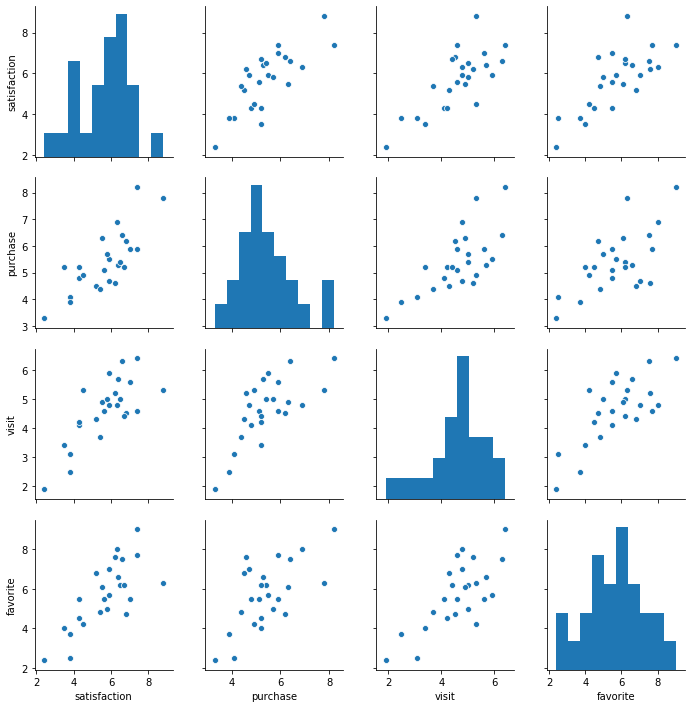

,satisfaction,purchase,visit,favorite
satisfaction,2.109167,1.276583,1.199167,1.796667
purchase,1.276583,1.292233,0.882167,1.210917
visit,1.199167,0.882167,1.191667,1.335833
favorite,1.796667,1.210917,1.335833,2.745000


In [11]:
# ヒストグラムと散布図、相関行列
sns.pairplot(df)
plt.show()
df.cov()

In [12]:
# パス図のをコーディングする
path_diagram = '''
    #　測定方程式
    loyal =~ satisfaction + purchase
    continue =~ visit + favorite
    #　構造方程式
    loyal ~ continue
    '''

In [13]:
# モデルインスタンスを作成し、データをフィット
sem = Model(path_diagram)
sem.fit(df)

SolverResult(fun=0.016122119649349953, success=True, n_it=27, x=array([0.70894046, 1.46135651, 1.32603995, 0.87737264, 0.7611837 ,
       0.18561835, 0.37176694, 0.29617158, 0.26650292]), message='Optimization terminated successfully.', name_method='SLSQP', name_obj='MLW')

In [14]:
# パス係数の仮設検定
sem.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,loyal,~,continue,1.326040,0.24502,5.41197,6.23357e-08
1,satisfaction,~,loyal,1.000000,-,-,-
2,purchase,~,loyal,0.708940,0.125875,5.6321,1.78033e-08
3,visit,~,continue,1.000000,-,-,-
4,favorite,~,continue,1.461357,0.276155,5.2918,1.21118e-07
5,continue,~~,continue,0.877373,0.329274,2.66457,0.00770868
6,loyal,~~,loyal,0.185618,0.229402,0.809142,0.418434
7,favorite,~~,favorite,0.761184,0.298906,2.54657,0.0108788
8,purchase,~~,purchase,0.371767,0.137729,2.69926,0.00694933
9,satisfaction,~~,satisfaction,0.296172,0.195809,1.51256,0.130392


In [15]:
# 適合度
calc_stats(sem)[["TLI","CFI","GFI","RMSEA"]]

,TLI,CFI,GFI,RMSEA
Value,1.054941,1.009157,0.994338,0


In [18]:
# パスダイアグラムとパス係数の可視化
g = semopy.semplot(sem, "tmp.png")
g

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

SyntaxError: invalid syntax (<ipython-input-19-d1d8467adf65>, line 1)